In [1]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np

import seaborn as sns
sns.set(style="ticks", palette="muted")

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix, classification_report, 
                             accuracy_score)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### Define functions

In [35]:
def evaluate_model(_y_test: DataFrame, _y_pred: DataFrame) -> None:
    print("Accuracy:  %0.2f" %accuracy_score(_y_test, _y_pred))
    print("Precision: %0.2f" %precision_score(_y_test, _y_pred , average="macro"))
    print("Recall:  %0.2f" %recall_score(_y_test, _y_pred , average="macro"))
    print("F1-score:  %0.2f" %f1_score(_y_test, _y_pred , average="macro"))
    
    print(confusion_matrix(_y_test, _y_pred))
    print(classification_report(_y_test, _y_pred))

In [2]:
# working directory
pwd: str = os.environ['HOME'] + '/work/assignment/assignment-6'

#### Read the input file

In [37]:
master: DataFrame = pd.read_csv(pwd + '/AdultUCI.csv')

#### Exploring null values

In [38]:
print(master.isna().sum())

age                   0
workclass          2799
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income            16281
dtype: int64


#### Filtering out rows with income = null

In [39]:
income_not_null = master['income'].notnull()
master = master[income_not_null]

#### Exploring null values (after removing income = null records)

In [40]:
print(master.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


#### Exploring field values summary

In [41]:
print(master.describe().T)

                  count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0  


#### Exploring field types

In [42]:
print(master.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None


#### Exploring field correlation

In [43]:
print(master.corr())

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
fnlwgt               -0.018768  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  


#### Explore the number of levels in each column

In [44]:
category_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
        'race', 'sex', 'native-country', 'income']
for col in category_cols:
    print('Col = ', col, ' :: Levels = ', len(master[col].unique()))

Col =  workclass  :: Levels =  9
Col =  education  :: Levels =  16
Col =  marital-status  :: Levels =  7
Col =  occupation  :: Levels =  15
Col =  relationship  :: Levels =  6
Col =  race  :: Levels =  5
Col =  sex  :: Levels =  2
Col =  native-country  :: Levels =  42
Col =  income  :: Levels =  2


#### Explore the distinct values in each column

In [45]:
for col in category_cols:
    print('Col = ', col)
    print(master[col].value_counts())
    print('=====================================')

Col =  workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Col =  education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Col =  marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
Col =  occupation
Prof-specialty       4140
Craft-repair         4099
Ex

#### Label encoding categorical variables

In [46]:
for col in category_cols:
    master[col] = master[col].astype('category')
    master[col].fillna(master[col].mode()[0], inplace=True)
    master[col] = master[[col]].apply(le.fit_transform)

master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB


#### Identify the predictor columns & target column

In [47]:
master_pred = master.drop(columns=['fnlwgt', 'relationship', 'capital-gain', 'capital-loss', 
                                   'hours-per-week', 'native-country', 'income'])
master_target = master['income']

#### Split data into training and testing set

In [48]:
x_train, x_test, y_train, y_test = train_test_split(master_pred, master_target, test_size=.2)

print(x_train.shape)
print(x_test.shape)

(26048, 8)
(6513, 8)


#### Executing Random Forest models for a range of tree count values & calculating the accuracies.

In [49]:
seq_rf: range = range(1, 101)
acc_rf = np.zeros(100)

for i in seq_rf:
    _rf = RandomForestClassifier(n_estimators=i)
    _model_rf = _rf.fit(x_train, y_train)
    _y_pred_rf = _model_rf.predict(x_test)
    acc_rf[i-1] = accuracy_score(y_test, _y_pred_rf)

#### Plot the accuracies against the tree counts.

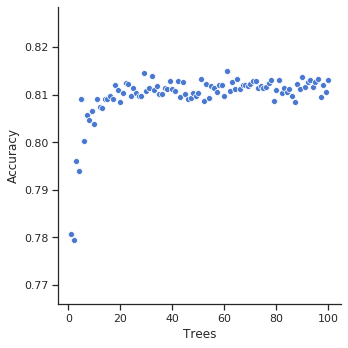

In [50]:
acc_rf_tuples: list = list(zip(seq_rf, acc_rf))
acc_rf_df: DataFrame = pd.DataFrame(acc_rf_tuples, columns=['Trees', 'Accuracy'])

sns.relplot(x='Trees', y='Accuracy', data=acc_rf_df)

#### Find the optimal tree count having the maximum accuracy

In [68]:
max_acc_rf = np.amax(acc_rf)
max_acc_trees = np.where(acc_rf == max_acc_rf)[0][0] + 1
print('Max accuracy =', max_acc_rf)
print('Tree count with max accuracy =', max_acc_trees)

Max accuracy = 0.814985413787809
Tree count with max accuracy = 61


#### Rebuilding Random Forest model with the optimal tree count

In [69]:
rf = RandomForestClassifier(n_estimators=max_acc_trees)
model_rf = rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

#### Evaluate the Random Forest model

In [70]:
evaluate_model(y_test, y_pred_rf)

Accuracy:  0.81
Precision: 0.75
Recall:  0.72
F1-score:  0.73
[[ 879  709]
 [ 513 4412]]
              precision    recall  f1-score   support

           0       0.63      0.55      0.59      1588
           1       0.86      0.90      0.88      4925

    accuracy                           0.81      6513
   macro avg       0.75      0.72      0.73      6513
weighted avg       0.81      0.81      0.81      6513



#### Build Naive Bayesian model

In [54]:
nb = GaussianNB()
model_nb = nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)

#### Evaluate the Naive Bayesian model

In [55]:
evaluate_model(y_test, y_pred_nb)

Accuracy:  0.79
Precision: 0.72
Recall:  0.74
F1-score:  0.73
[[1038  550]
 [ 831 4094]]
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      1588
           1       0.88      0.83      0.86      4925

    accuracy                           0.79      6513
   macro avg       0.72      0.74      0.73      6513
weighted avg       0.80      0.79      0.79      6513



#### Executing KNN models for a range of neighbor count values & calculating the accuracies.

In [63]:
seq_knn: range = range(1, 21)
acc_knn = np.zeros(20)

for i in seq_knn:
    _knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    _model_knn = _knn.fit(x_train, y_train)
    _y_pred_knn = _model_knn.predict(x_test)
    acc_knn[i-1] = accuracy_score(y_test, _y_pred_knn)

#### Plot the accuracies against the neighbor counts.

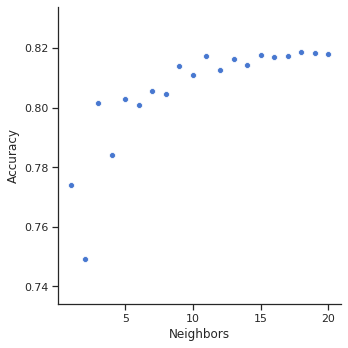

In [64]:
acc_knn_tuples: list = list(zip(seq_knn, acc_knn))
acc_knn_df: DataFrame = pd.DataFrame(acc_knn_tuples, columns=['Neighbors', 'Accuracy'])

sns.relplot(x='Neighbors', y='Accuracy', data=acc_knn_df)

#### Find the optimal neighbor count having the maximum accuracy

In [65]:
max_acc_knn = np.amax(acc_knn)
max_acc_neighbors = np.where(acc_knn == max_acc_knn)[0][0] + 1
print('Max accuracy =', max_acc_knn)
print('Neighbor count with max accuracy =', max_acc_neighbors)

Max accuracy = 0.8186703516044833
Neighbor count with max accuracy = 18


#### Rebuilding KNN model with the optimal neighbor count

In [66]:
knn = KNeighborsClassifier(n_neighbors=max_acc_neighbors, weights='uniform')
model_knn = knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)

#### Evaluate the KNN model

In [67]:
evaluate_model(y_test, y_pred_knn)


Accuracy:  0.82
Precision: 0.75
Recall:  0.75
F1-score:  0.75
[[ 974  614]
 [ 567 4358]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1588
           1       0.88      0.88      0.88      4925

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513

